# Sesion 2

## Leer archivos CSV

In [1]:
import csv

In [3]:
csvfile = open('data-text.csv', 'r')

reader = csv.reader(csvfile)

In [4]:
reader

In [ ]:
for row in reader:
    print(row)

In [ ]:
with open('data-text.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

## Crear un archivo CSV

In [14]:
with open('mis_datos.csv', 'w', newline="") as file:
    writer = csv.writer(file)

    writer.writerow(['ID', 'Name', 'Age'])
    writer.writerow(['1', 'Lorena', '25'])
    writer.writerow(['2', 'Saul', '35'])

In [15]:
with open('mis_datos.csv', 'r') as file:
    reader = csv.reader(file)

    for row in reader:
        print(row[1])

Name
Lorena
Saul


## Leer un CSV con la librería pandas

In [ ]:
!pip3 install pandas

In [21]:
import pandas as pd

In [22]:
datos = pd.read_csv('mis_datos.csv')

In [23]:
datos

,ID,Name,Age
0,1,Lorena,25
1,2,Saul,35


In [ ]:
data_text = pd.read_csv('data-text.csv')
data_text

Lectura de un archivo csv de internet.

In [27]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
tags = pd.read_excel('tags.xlsx', )

## Leer un archivo JSON

In [40]:
import json

In [42]:
json_data = open('data-text.json').read()

In [47]:
json_data[:200]

'[\n  {\n    "Indicator":"Life expectancy at birth (years)",\n    "PUBLISH STATES":"Published",\n    "Year":1990,\n    "WHO region":"Europe",\n    "World Bank income group":"High-income",\n    "Country":"Ando'

In [ ]:
json.loads(json_data)

## Lecturas de TXT

In [48]:
import urllib.request

In [49]:
url = 'https://www.gutenberg.org/files/1112/1112.txt'

response = urllib.request.urlopen(url)

In [50]:
response

In [52]:
text = response.read().decode()

In [54]:
text[0:500]

"The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare\r\n\r\n\r\n*******************************************************************\r\nTHIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A\r\nTIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE\r\nIS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK\r\n(#1513) at https://www.gutenberg.org/ebooks/1513\r\n*******************************************************************\r\n\r\n\r\nThis eBook is for the use "

## Leer datos desde un API

In [ ]:
!pip install requests

In [55]:
import requests

In [58]:
url = 'http://api.open-notify.org/this-api-doesnt-exist'

response = requests.get(url)

In [59]:
response

<Response [404]>

In [60]:
url = 'http://api.open-notify.org/astros.json'

response = requests.get(url)

In [61]:
response

<Response [200]>

In [62]:
data = response.json()

In [63]:
data

{'people': [{'craft': 'ISS', 'name': 'Oleg Artemyev'},
  {'craft': 'ISS', 'name': 'Denis Matveev'},
  {'craft': 'ISS', 'name': 'Sergey Korsakov'},
  {'craft': 'ISS', 'name': 'Kjell Lindgren'},
  {'craft': 'ISS', 'name': 'Bob Hines'},
  {'craft': 'ISS', 'name': 'Samantha Cristoforetti'},
  {'craft': 'ISS', 'name': 'Jessica Watkins'}],
 'message': 'success',
 'number': 7}

In [65]:
df = pd.DataFrame(data['people'])
df

,craft,name
0,ISS,Oleg Artemyev
1,ISS,Denis Matveev
2,ISS,Sergey Korsakov
3,ISS,Kjell Lindgren
4,ISS,Bob Hines
5,ISS,Samantha Cristoforetti
6,ISS,Jessica Watkins


In [66]:
df['name']

0             Oleg Artemyev
1             Denis Matveev
2           Sergey Korsakov
3            Kjell Lindgren
4                 Bob Hines
5    Samantha Cristoforetti
6           Jessica Watkins
Name: name, dtype: object

In [67]:
df.iloc[0]

craft              ISS
name     Oleg Artemyev
Name: 0, dtype: object

Parametros

In [68]:
parameters = {
    "lat": 40.71,
    "lon": -74,
    "n": 9
}

In [71]:
url = 'http://api.open-notify.org/iss-pass.json'
response = requests.get(url, params = parameters)

In [72]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1654135319,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 9},
 'response': [{'duration': 362, 'risetime': 1654138256},
  {'duration': 454, 'risetime': 1654186818},
  {'duration': 652, 'risetime': 1654192488},
  {'duration': 614, 'risetime': 1654198327},
  {'duration': 559, 'risetime': 1654204216},
  {'duration': 604, 'risetime': 1654210058},
  {'duration': 651, 'risetime': 1654215860},
  {'duration': 496, 'risetime': 1654221711},
  {'duration': 276, 'risetime': 1654270431}]}

In [73]:
url = 'https://pokeapi.co/api/v2/pokemon/'
response = requests.get(url)

In [76]:
response.json()['results']

[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
 {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
 {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
 {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
 {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
 {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
 {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
 {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
 {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
 {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
 {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
 {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
 {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
 {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
 {'name': '

In [8]:
import requests

In [9]:
url = 'https://pokeapi.co/api/v2/pokemon/4'
response = requests.get(url)

In [10]:
pokemon= response.json()

In [11]:
pokemon['name']

'charmander'

In [12]:
pokemon['types']

[{'slot': 1,
  'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}]

In [13]:
pokemon['sprites']['front_default']

'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, 'charmander')

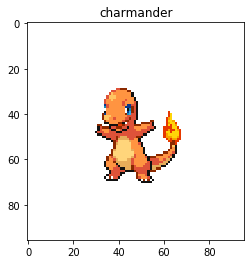

In [16]:
plt.imshow(mpimg.imread(pokemon['sprites']['front_default']))
plt.title(pokemon['name'])

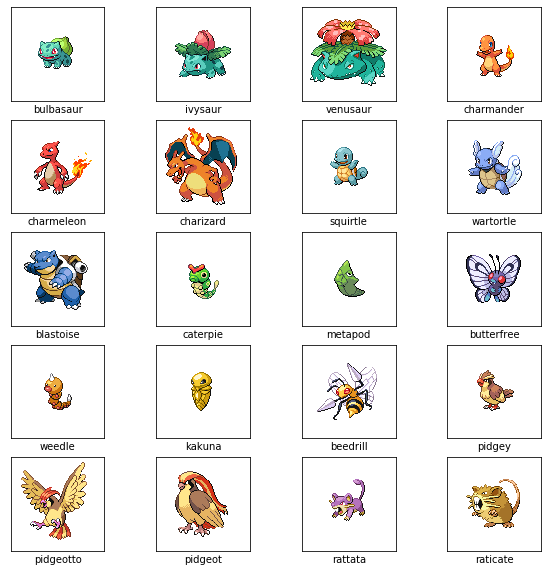

In [19]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)

    url = 'https://pokeapi.co/api/v2/pokemon/{}'.format(i+1)
    response = requests.get(url)
    pokemon = response.json()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(pokemon['sprites']['front_default']))
    plt.xlabel(pokemon['name'])
plt.show()